# OW Data Challenge

### Importing the packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Reading the data

In [2]:
data_case_storage='/Users/agirelli/Desktop/OW/stored_data_case.h5'

In [3]:
## Definition of a function listing all tables in the datafile
def list_HDF_file(file_name):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
        result = store.keys()   
    return result

In [4]:
## Calling example
list_HDF_file(data_case_storage)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


['/parking_counts', '/parkmeters_zones_12_12', '/transaction_and_locations']

In [5]:
## Definition of a function reading a table 
def read_HDF_file(file_name, table):
    with pd.HDFStore(file_name, complevel=9, complib='blosc') as store:
         return store[table]

### Parking meter transaction data
#### All transactions of Paris parking meters, with amount paid, duration hours, date, etc.

In [6]:
## table /transactions_and_locations(column labels and data) 
df=read_HDF_file(data_case_storage,'/transaction_and_locations')

In [7]:
df.system.drop_duplicates()

0     MIX
82    ROT
Name: system, dtype: object

In [8]:
df['count'] = 1

In [9]:
df['start_weekday'] = df['parking_start'].dt.weekday

In [10]:
df['park_hour'] = df['parking_start'].dt.hour

In [11]:
df['park_min'] = df['parking_start'].dt.minute

In [12]:
data2 = df[df['start_weekday']<5].groupby(['park_hour'])[['count']].sum()
data3 = df[df['start_weekday']>4].groupby(['park_hour'])[['count']].sum()

In [13]:
data2 = data2.reset_index()
data3 = data3.reset_index()

In [14]:
data2['Weekend'] = data3['count']

In [15]:
data2['Monday to Friday'] = data2['count']

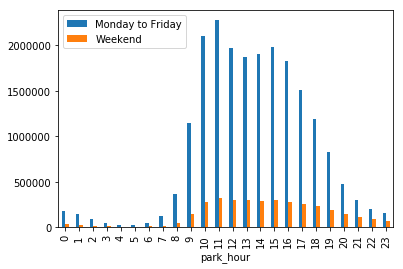

In [16]:
data2.plot(x='park_hour', y=['Monday to Friday','Weekend'], kind = 'bar')